Training DataFrame:
   retail_price  cost_price  discount_percentage  discounted_price
1            22        8.00             0.138000             12.00
2            43        8.00             0.000476             12.00
3             8        8.00             0.040300             12.00
4             3        2.72             0.001240              4.08
5             9        3.92             0.000200              5.88
Mean Squared Error: 0.00011751217980296146
R-squared Score: 0.999995917419684


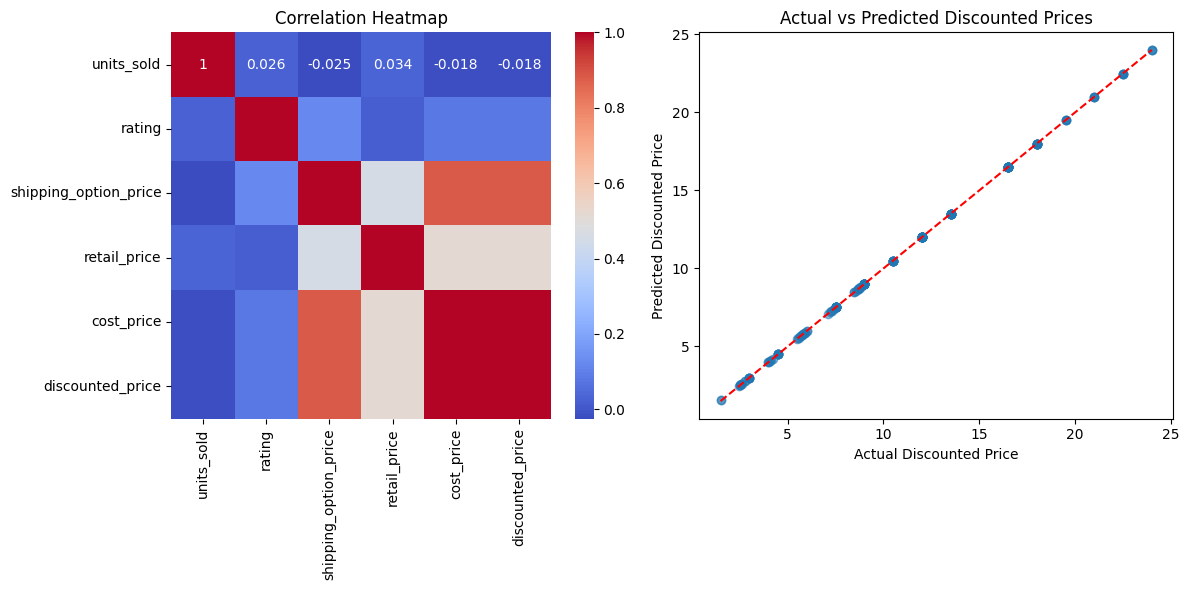

Model Accuracy: 0.999995917419684
Discounted Price for Product ID 12345: Product not found
   retail_price  cost_price  discount_percentage  discounted_price
1            22        8.00             0.138000             12.00
2            43        8.00             0.000476             12.00
3             8        8.00             0.040300             12.00
4             3        2.72             0.001240              4.08
5             9        3.92             0.000200              5.88


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

# Assuming 'price' column is the cost price in this dataset
df.rename(columns={'price': 'cost_price'}, inplace=True)

# Filter out rows where retail_price is less than cost_price
df = df[df['retail_price'] >= df['cost_price']]

# Define weights for the formula
MIN_PROF_MARGIN = 0.5  # Example value for minimum profit margin
X1 = 0.5  # Example value for X1
X2 = 0.8  # Example value for X2
X3 = 0.7  # Example value for X3

# Calculate Discount Percentage
VELOCITY_FACTOR = df['units_sold'] / df['units_sold'].max()  # Normalize units_sold
LIFECYLE_STAGE_FACTOR = df['rating'] / df['rating'].max()  # Normalize rating
STOCK_Q_FACTOR = df['shipping_option_price'] / df['shipping_option_price'].max()  # Normalize shipping_option_price
df['discount_percentage'] = MIN_PROF_MARGIN * (X1 * VELOCITY_FACTOR) * (X2 * LIFECYLE_STAGE_FACTOR) / (X3 * STOCK_Q_FACTOR)

# Ensure the discounted price is above the cost price
df['discounted_price'] = df['cost_price'] + (df['cost_price'] * MIN_PROF_MARGIN)

# Display the updated DataFrame
print("Training DataFrame:")
print(df[['retail_price', 'cost_price', 'discount_percentage', 'discounted_price']].head())

# Define X (features) and y (target variable)
X = df[['units_sold', 'rating', 'shipping_option_price', 'retail_price', 'cost_price']]  # Including cost_price as a feature
y = df['discounted_price']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared Score:", r_squared)

# Visualizations
plt.figure(figsize=(12, 6))

# Heatmap of correlations
plt.subplot(1, 2, 1)
sns.heatmap(df[['units_sold', 'rating', 'shipping_option_price', 'retail_price', 'cost_price', 'discounted_price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Scatter plot of actual vs predicted discounted prices
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Discounted Price')
plt.ylabel('Predicted Discounted Price')
plt.title('Actual vs Predicted Discounted Prices')

plt.tight_layout()
plt.show()

# Print the accuracy of the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Function to get discounted price based on inputs
def get_discounted_price(product_id, quantity, proposed_price):
    product = df[df['product_id'] == product_id]
    if product.empty:
        return "Product not found"
    
    # Prepare the input features for the model
    input_features = product[['units_sold', 'rating', 'shipping_option_price', 'retail_price', 'cost_price']].values[0].reshape(1, -1)
    
    # Predict the discounted price using the trained model
    predicted_discounted_price = model.predict(input_features)[0]
    
    # Ensure the discounted price is above the cost price
    discounted_price = max(predicted_discounted_price, product['cost_price'].values[0])
    
    return discounted_price

# Example usage
product_id = 12345  # Replace with actual product_id
quantity = 10  # Replace with actual quantity
proposed_price = 50.0  # Replace with actual proposed price

discounted_price = get_discounted_price(product_id, quantity, proposed_price)
print(f"Discounted Price for Product ID {product_id}: {discounted_price}")

# Display the updated DataFrame
print(df[['retail_price', 'cost_price', 'discount_percentage', 'discounted_price']].head())


Training DataFrame:
   retail_price  cost_price  discount_percentage  discounted_price
1            22        8.00             0.138000             12.00
2            43        8.00             0.000476             12.00
3             8        8.00             0.040300             12.00
4             3        2.72             0.001240              4.08
5             9        3.92             0.000200              5.88
Mean Squared Error: 7.004349753695001e-05
R-squared Score: 0.9999975665653995


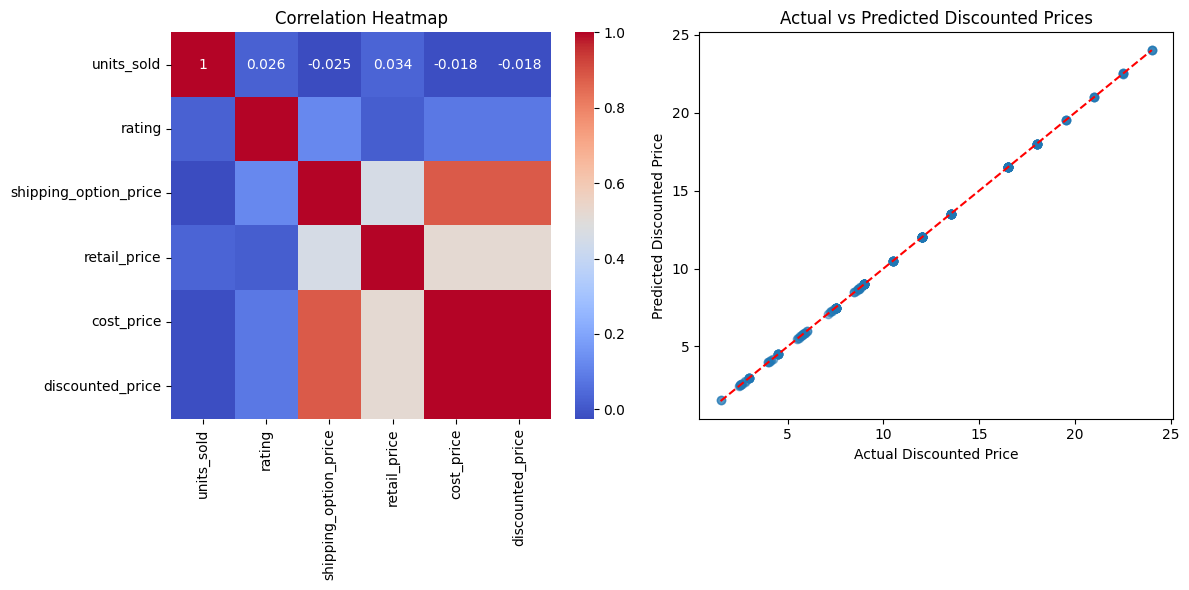

Model Accuracy: 0.9999975665653995
Negotiated Price for Product ID 5d806ae97c339c307264cf76: 350.0
      retail_price  cost_price  discount_percentage  discounted_price
51              11        5.84              0.01676              8.76
1052            11        5.84              0.01676              8.76


/home/yuv/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

# Assuming 'price' column is the cost price in this dataset
df.rename(columns={'price': 'cost_price'}, inplace=True)

# Filter out rows where retail_price is less than cost_price
df = df[df['retail_price'] >= df['cost_price']]

# Define weights for the formula
MIN_PROF_MARGIN = 0.5  # Example value for minimum profit margin
X1 = 0.5  # Example value for X1
X2 = 0.8  # Example value for X2
X3 = 0.7  # Example value for X3

# Calculate Discount Percentage
VELOCITY_FACTOR = df['units_sold'] / df['units_sold'].max()  # Normalize units_sold
LIFECYLE_STAGE_FACTOR = df['rating'] / df['rating'].max()  # Normalize rating
STOCK_Q_FACTOR = df['shipping_option_price'] / df['shipping_option_price'].max()  # Normalize shipping_option_price
df['discount_percentage'] = MIN_PROF_MARGIN * (X1 * VELOCITY_FACTOR) * (X2 * LIFECYLE_STAGE_FACTOR) / (X3 * STOCK_Q_FACTOR)

# Ensure the discounted price is above the cost price
df['discounted_price'] = df['cost_price'] + (df['cost_price'] * MIN_PROF_MARGIN)

# Display the updated DataFrame
print("Training DataFrame:")
print(df[['retail_price', 'cost_price', 'discount_percentage', 'discounted_price']].head())

# Define X (features) and y (target variable)
X = df[['units_sold', 'rating', 'shipping_option_price', 'retail_price', 'cost_price']]  # Including cost_price as a feature
y = df['discounted_price']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared Score:", r_squared)

# Visualizations
plt.figure(figsize=(12, 6))

# Heatmap of correlations
plt.subplot(1, 2, 1)
sns.heatmap(df[['units_sold', 'rating', 'shipping_option_price', 'retail_price', 'cost_price', 'discounted_price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Scatter plot of actual vs predicted discounted prices
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Discounted Price')
plt.ylabel('Predicted Discounted Price')
plt.title('Actual vs Predicted Discounted Prices')

plt.tight_layout()
plt.show()

# Print the accuracy of the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Function to get discounted price based on inputs
def get_discounted_price(product_id, quantity, proposed_price):
    product = df[df['product_id'] == product_id]
    if product.empty:
        return "Product not found"
    
    # Prepare the input features for the model
    input_features = product[['units_sold', 'rating', 'shipping_option_price', 'retail_price', 'cost_price']].values[0].reshape(1, -1)
    
    # Predict the discounted price using the trained model
    predicted_discounted_price = model.predict(input_features)[0]
    
    # Ensure the discounted price is above the cost price
    discounted_price = max(predicted_discounted_price, product['cost_price'].values[0])
    
    return discounted_price

# Function to negotiate the discounted price
def negotiate_discounted_price(product_id, quantity, proposed_price):
    discounted_price = get_discounted_price(product_id, quantity, proposed_price)
    
    # Define negotiation threshold (e.g., ±5% of the discounted price)
    threshold = 0.05
    lower_bound = discounted_price * (1 + threshold)
    
    # Negotiate the price
    if proposed_price >= lower_bound:
        return proposed_price  # Accept the proposed price if it's above the lower bound
    else:
        return lower_bound  # Counter with the lower bound price

# Input function to collect features from the Rasa model
def collect_features_from_rasa():
    # Placeholder function to simulate collecting features from Rasa
    product_id = input("Enter the product ID: ")
    quantity = int(input("Enter the quantity: "))
    proposed_price = float(input("Enter the proposed price: "))
    
    return product_id, quantity, proposed_price

# Example usage with input function
product_id, quantity, proposed_price = collect_features_from_rasa()
negotiated_price = negotiate_discounted_price(product_id, quantity, proposed_price)
print(f"Negotiated Price for Product ID {product_id}: {negotiated_price}")

# Display the specific row for the given product_id
def display_product_row(product_id):
    product_row = df[df['product_id'] == product_id]
    if product_row.empty:
        print("Product not found")
    else:
        print(product_row[['retail_price', 'cost_price', 'discount_percentage', 'discounted_price']])

# Example usage to display a specific row
display_product_row(product_id)


In [6]:
import pandas as pd

# Create a sample dataset
data = {
    'product_id': [
        '5d806ae97c339c307264cf76', '5d806ae97c339c307264cf77', '5d806ae97c339c307264cf78',
        '5d806ae97c339c307264cf79', '5d806ae97c339c307264cf80', '5d806ae97c339c307264cf81',
        '5d806ae97c339c307264cf82', '5d806ae97c339c307264cf83', '5d806ae97c339c307264cf84',
        '5d806ae97c339c307264cf85'
    ],
    'units_sold': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
    'rating': [4.5, 4.0, 3.5, 4.2, 4.8, 3.8, 4.1, 4.3, 4.7, 4.6],
    'shipping_option_price': [5.0, 7.5, 6.0, 8.0, 5.5, 7.0, 6.5, 8.5, 5.0, 7.5],
    'retail_price': [50.0, 75.0, 60.0, 80.0, 55.0, 70.0, 65.0, 85.0, 50.0, 75.0],
    'cost_price': [30.0, 50.0, 40.0, 55.0, 35.0, 45.0, 42.0, 60.0, 32.0, 50.0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('test_dataset.csv', index=False)

# Display the DataFrame
print(df)


                 product_id  units_sold  rating  shipping_option_price  \
0  5d806ae97c339c307264cf76         100     4.5                    5.0   
1  5d806ae97c339c307264cf77         150     4.0                    7.5   
2  5d806ae97c339c307264cf78         200     3.5                    6.0   
3  5d806ae97c339c307264cf79         250     4.2                    8.0   
4  5d806ae97c339c307264cf80         300     4.8                    5.5   
5  5d806ae97c339c307264cf81         350     3.8                    7.0   
6  5d806ae97c339c307264cf82         400     4.1                    6.5   
7  5d806ae97c339c307264cf83         450     4.3                    8.5   
8  5d806ae97c339c307264cf84         500     4.7                    5.0   
9  5d806ae97c339c307264cf85         550     4.6                    7.5   

   retail_price  cost_price  
0          50.0        30.0  
1          75.0        50.0  
2          60.0        40.0  
3          80.0        55.0  
4          55.0        35.0  
5    

In [7]:
ddf=pd.read_csv('/home/yuv/miniproject/amazon/test_dataset.csv')
product_id,quantity,proposed_price=collect_features_from_rasa()
discount_price=get_discounted_price(product_id,quantity,proposed_price)
final_price=negotiate_discounted_price(product_id,quantity,proposed_price)
print(discount_price,final_price)

KeyboardInterrupt: Interrupted by user